In [157]:
#importing the Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [158]:
#Data collecting and Analysis

insurance_data= pd.read_csv('insurance.csv')

In [159]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [160]:
#Number of Rows and Columns
insurance_data.shape

(1338, 7)

In [161]:
#Getting some information about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [162]:
#categorical fetures : sex ,smoker ,region

In [163]:
# Chake Missing Values:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [164]:
#Data Analysis :
# Statistical measures of dataset
insurance_data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\shete\AppData\Local\Temp\ipykernel_9440\3583537862.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


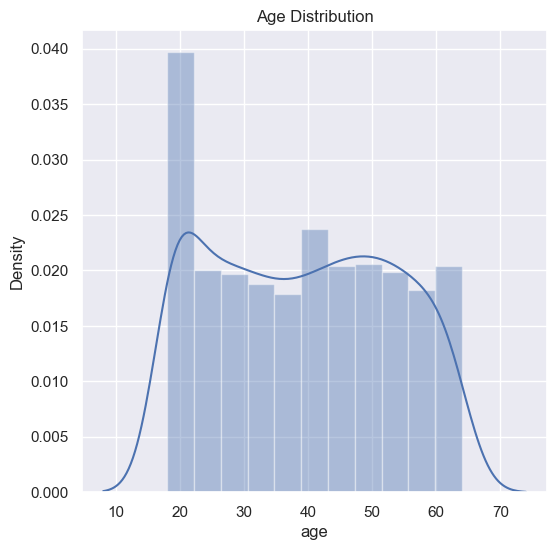

In [165]:
#distribution of age values:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

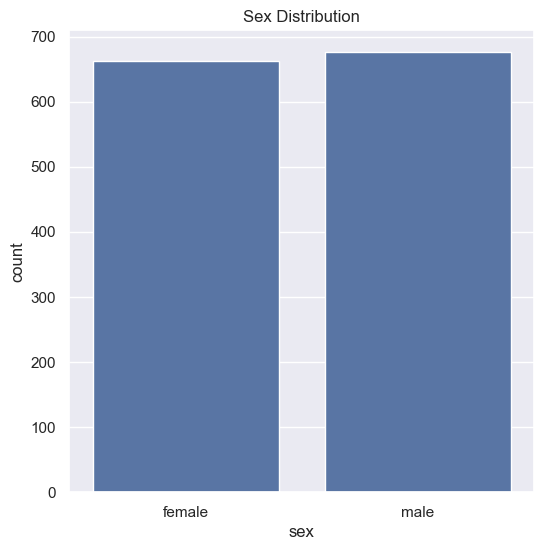

In [166]:
#distribution of gender column:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data =insurance_data)
plt.title('Sex Distribution')
plt.show()

In [167]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\shete\AppData\Local\Temp\ipykernel_9440\1087958598.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


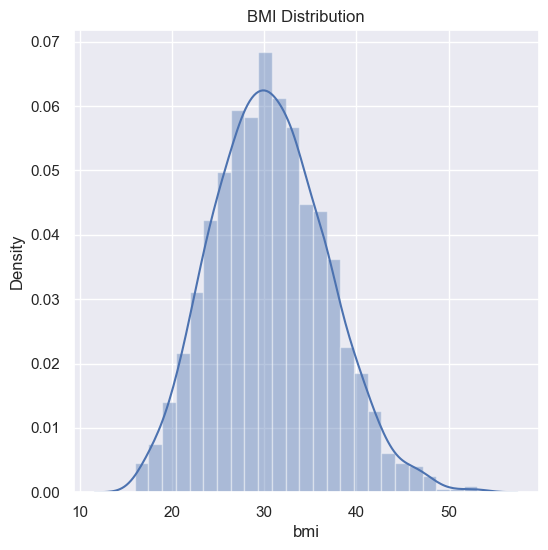

In [168]:
# bmi distribution:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [169]:
# Normal BMI range - 18.5-24.9


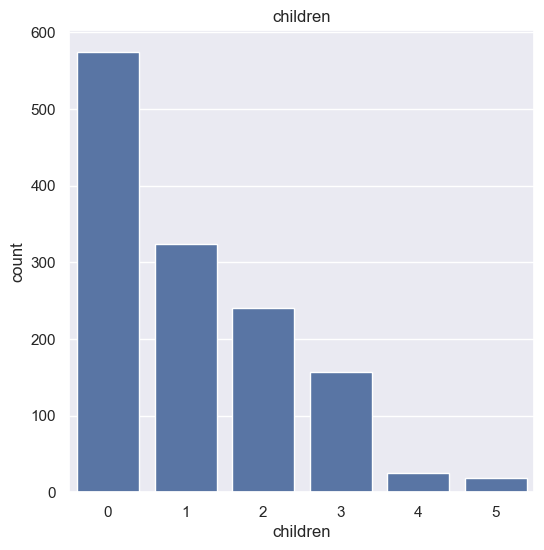

In [170]:
#Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('children')
plt.show()

In [171]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

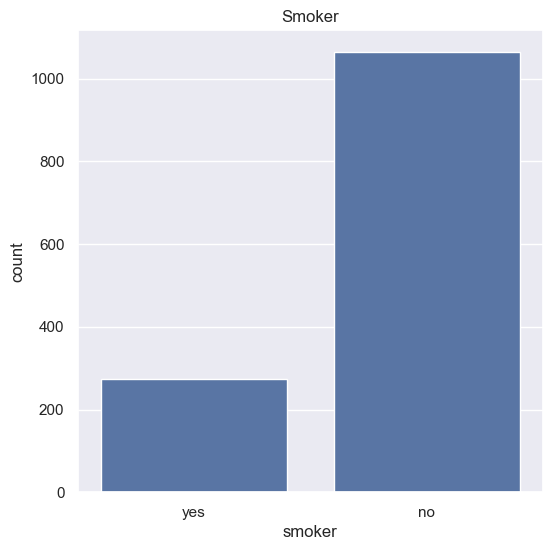

In [172]:
#Children column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker')
plt.show()

In [173]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

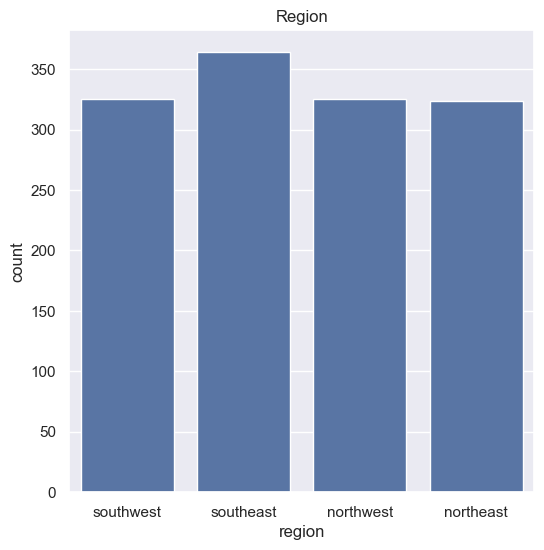

In [174]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region')
plt.show()

In [175]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\shete\AppData\Local\Temp\ipykernel_9440\563078184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


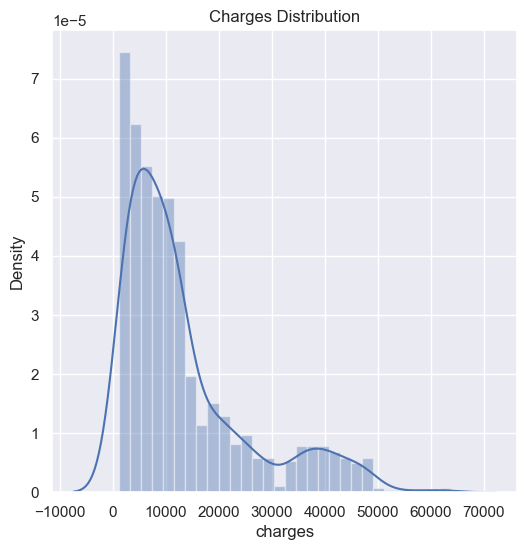

In [176]:
#distribution of charges:
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

In [177]:
# Data Pre- Proccesing:

In [178]:
# Encoding sex column:
insurance_data.replace({'sex':{'male': 0, 'female':1}},inplace=True)

C:\Users\shete\AppData\Local\Temp\ipykernel_9440\2980987530.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male': 0, 'female':1}},inplace=True)


In [179]:
# Encoding smoker column:
insurance_data.replace({'smoker':{'yes': 0 , 'no': 1}}, inplace=True)

C:\Users\shete\AppData\Local\Temp\ipykernel_9440\1346695464.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes': 0 , 'no': 1}}, inplace=True)


In [180]:
#Encoding region column
insurance_data.replace({'region':{'southeast': 0 , 'southwest': 1 , 'northeast':2, 'northwest':3}},inplace=True)

C:\Users\shete\AppData\Local\Temp\ipykernel_9440\1783931856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'region':{'southeast': 0 , 'southwest': 1 , 'northeast':2, 'northwest':3}},inplace=True)


In [181]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [182]:
#splitting the features and target
X=insurance_data.drop(columns='charges', axis=1)
Y=insurance_data['charges']

In [183]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [184]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [185]:
#Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [186]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [187]:
#Model training

In [188]:
#Loading the Linear Regression model
regressor=LinearRegression()

In [189]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [190]:
#Model evaluation
#prediction on traing data
traing_data_prediction=regressor.predict(X_train)

In [191]:
#R squared value
r2_train= metrics.r2_score(Y_train,traing_data_prediction)
print('R squared value=',r2_train)

R squared value= 0.751505643411174


In [192]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [193]:
#R squared value
r2_test= metrics.r2_score(Y_test,test_data_prediction)
print('R squared value=',r2_test)

R squared value= 0.7447273869684077


In [194]:
#Building a predictive system
input_data=(31,1,25.74,0,1,0)

#changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)

print('The Insurance Cost Prise is USD:', prediction[0])

The Insurance Cost Prise is USD: 3760.0805764960496


C:\Users\shete\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [195]:
#Building a predictive system
input_data=(61,1,29.070,0,0,3)

#changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)

print('The Insurance Cost Prise is USD:', prediction[0])

The Insurance Cost Prise is USD: 36968.05564505548


C:\Users\shete\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [196]:

#Building a predictive system
input_data=(50,0,30.970,3,1,3)

#changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction= regressor.predict(input_data_reshaped)

print('The Insurance Cost Prise is USD:', prediction[0])

The Insurance Cost Prise is USD: 12617.431688095809


C:\Users\shete\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
